### Import the bigquery table into a pandas dataframe using the following code snippet

In [2]:
import google.datalab.bigquery as bq
import pandas as pd

my_query = """
SELECT 
    * 
FROM 
    `cmpe256.amazonbook.new_books`

LIMIT 200000
"""

df = bq.Query(my_query).execute().result().to_dataframe()

In [3]:
#View first 10 instances
df.head(10)

,reviewText,overall
0,This book was a very ssllooww read. It was bor...,2.0
1,"Clinton Ray, or ""Black"", along with his friend...",2.0
2,Not impressed with this book at all. There is...,2.0
3,We chose this book as our first book club read...,2.0
4,This book is more of an information dump about...,2.0
5,Nothing greatHard working mother who wanted mo...,2.0
6,Seems like this book was written to employees ...,2.0
7,I'm not a pure romance-lover. I like a bit of...,2.0
8,Not for me. Will give to local library as it m...,2.0
9,I don't remember who recommended that I buy Je...,2.0


,reviewText,overall
0,This book was a very ssllooww read. It was bor...,2.0
1,"Clinton Ray, or ""Black"", along with his friend...",2.0
2,Not impressed with this book at all. There is...,2.0
3,We chose this book as our first book club read...,2.0
4,This book is more of an information dump about...,2.0
5,Nothing greatHard working mother who wanted mo...,2.0
6,Seems like this book was written to employees ...,2.0
7,I'm not a pure romance-lover. I like a bit of...,2.0
8,Not for me. Will give to local library as it m...,2.0
9,I don't remember who recommended that I buy Je...,2.0


In [4]:
#Quick stats
df.describe()

,overall
count,200000.000000
mean,4.269010
std,1.046847
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


,overall
count,200000.000000
mean,4.269010
std,1.046847
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [5]:
#Dimensions of dataset
df.shape

(200000, 2)

(200000, 2)

In [6]:
#Check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
reviewText    200000 non-null object
overall       200000 non-null float64
dtypes: float64(1), object(1)
memory usage: 3.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
reviewText    200000 non-null object
overall       200000 non-null float64
dtypes: float64(1), object(1)
memory usage: 3.1+ MB


In [7]:
#View last 
df.tail(10)

,reviewText,overall
199990,"I guess I am getting tired of these new, young...",1.0
199991,I am an avid reader. I especially love the dar...,1.0
199992,I lost interest in the first few pages. The ma...,1.0
199993,"I never recieved this book, it was probaly los...",1.0
199994,"""John Keitz"" and ""Ivy avid reader"" reviews are...",1.0
199995,Not to be confused with the best seller 303 Ki...,1.0
199996,I'm all for strange and out if the box type wr...,1.0
199997,I read the synopsis of this novel and assumed ...,1.0
199998,Maybe this pampered celebrity might have shown...,1.0
199999,"Well, Bill Wiese claims to have gone to Hell f...",1.0


,reviewText,overall
199990,"I guess I am getting tired of these new, young...",1.0
199991,I am an avid reader. I especially love the dar...,1.0
199992,I lost interest in the first few pages. The ma...,1.0
199993,"I never recieved this book, it was probaly los...",1.0
199994,"""John Keitz"" and ""Ivy avid reader"" reviews are...",1.0
199995,Not to be confused with the best seller 303 Ki...,1.0
199996,I'm all for strange and out if the box type wr...,1.0
199997,I read the synopsis of this novel and assumed ...,1.0
199998,Maybe this pampered celebrity might have shown...,1.0
199999,"Well, Bill Wiese claims to have gone to Hell f...",1.0


In [8]:
#Data manipulation and math
import numpy as np

#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
! pip install wordcloud
from wordcloud import WordCloud,STOPWORDS

#Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer

#Regex
import re

#Train-Test Splitting
from sklearn.model_selection import train_test_split

#Classifer
from sklearn.linear_model import LogisticRegression

#Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve 
from sklearn.metrics import roc_auc_score

### Data Visualization

Text(0,0.5,'Frequency')

Text(0,0.5,'Frequency')

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


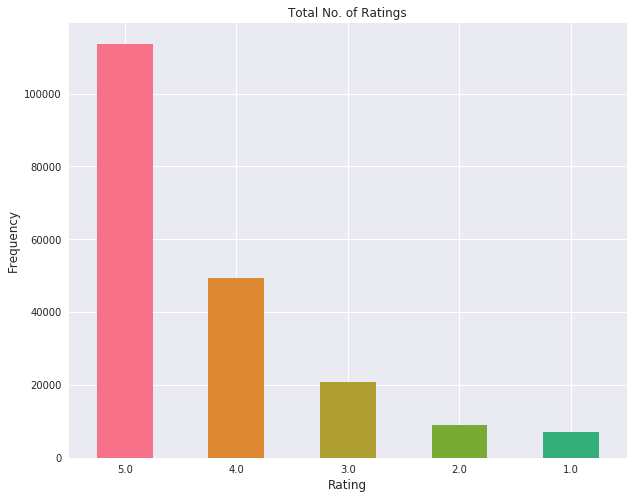

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


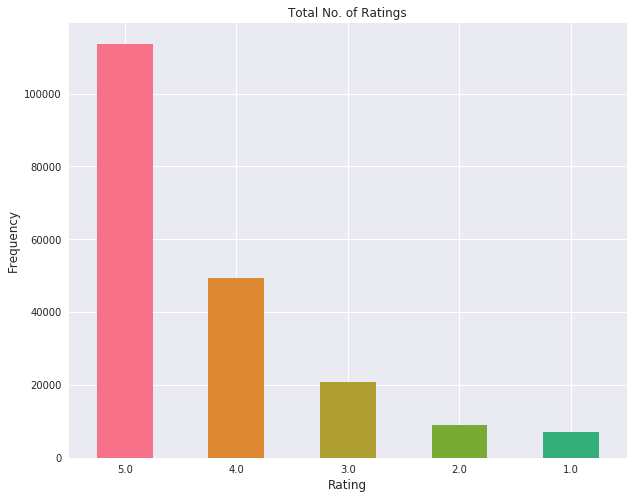

In [9]:
#Visualize the number of reviews
colors=sns.color_palette("husl", 10)
pd.Series(df["overall"]).value_counts().plot(kind = "bar",color=colors,figsize=(10,8),rot=0, title = "Total No. of Ratings")
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

In [10]:
#We will create a new column that combines the rating 1-3 as negative and 4-5 as positive
df['Sentiment']=df['overall'].apply(lambda x: 0 if x<=3 else 1)

Text(0,0.5,'Frequency')

Text(0,0.5,'Frequency')

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


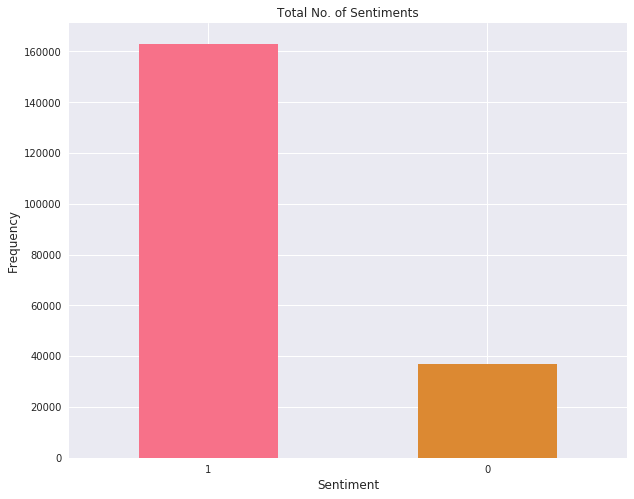

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


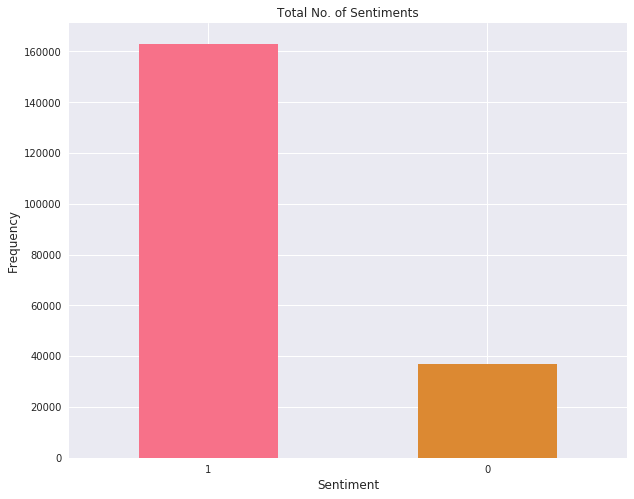

In [11]:
#Visualize as before
colors=sns.color_palette("husl", 10)
pd.Series(df["Sentiment"]).value_counts().plot(kind = "bar",color=colors,figsize=(10,8),rot=0, title = "Total No. of Sentiments")
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

In [12]:
#Visualization using wordcloud 
def wcloud(val):
    """
    This function takes input a binary integer value 0 or 1
    and returns the respective word cloud for the associated sentiment.
    """
    df1=df[df['Sentiment']==val]
    words = ' '.join(df1['reviewText'])
    cleaned_word = " ".join([word for word in words.split()])
    wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', width=2000, height=1500).generate(cleaned_word)
    plt.figure(1,figsize=(15, 15))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


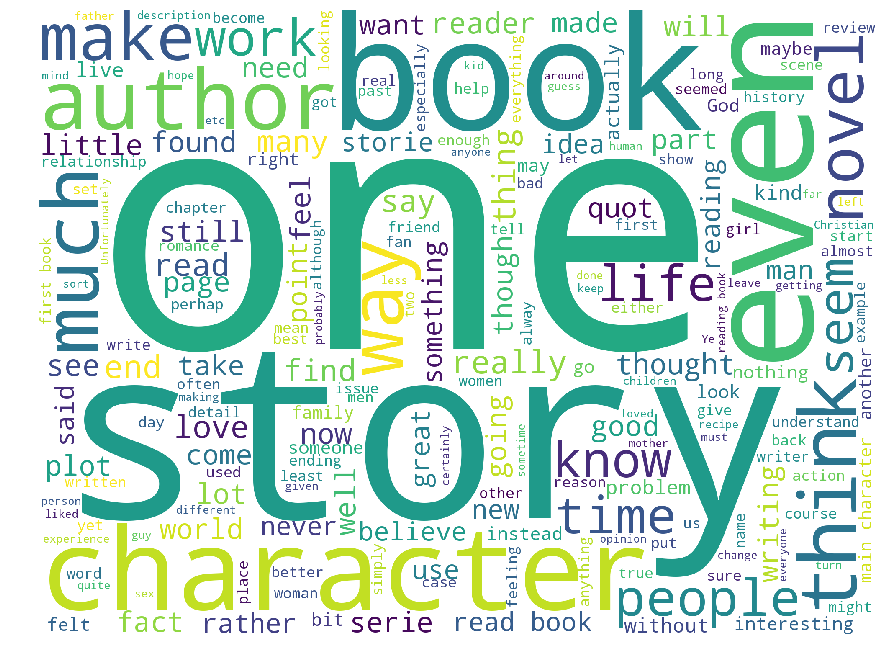

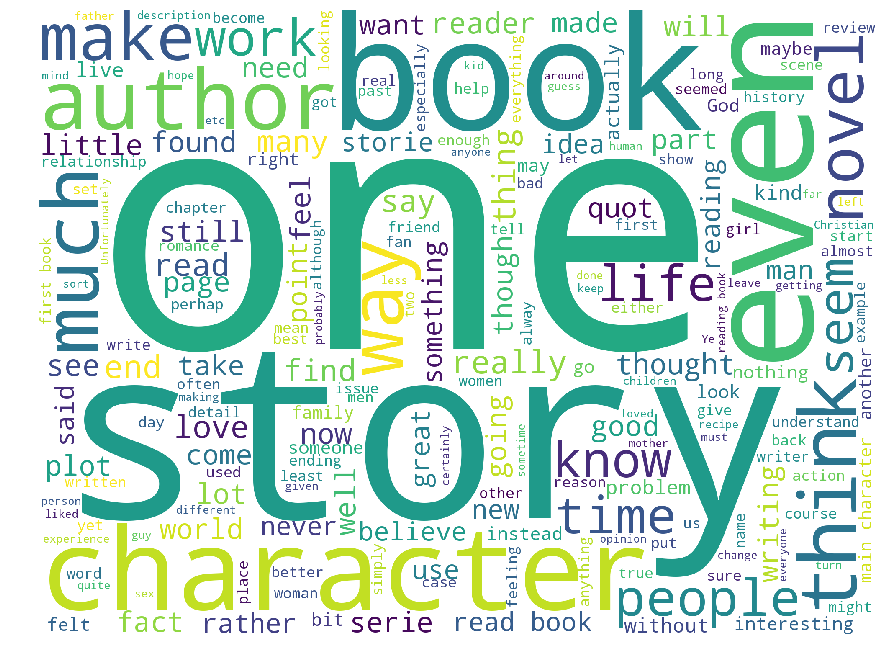

In [13]:
wcloud(0) #Visualualize negative sentiments

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


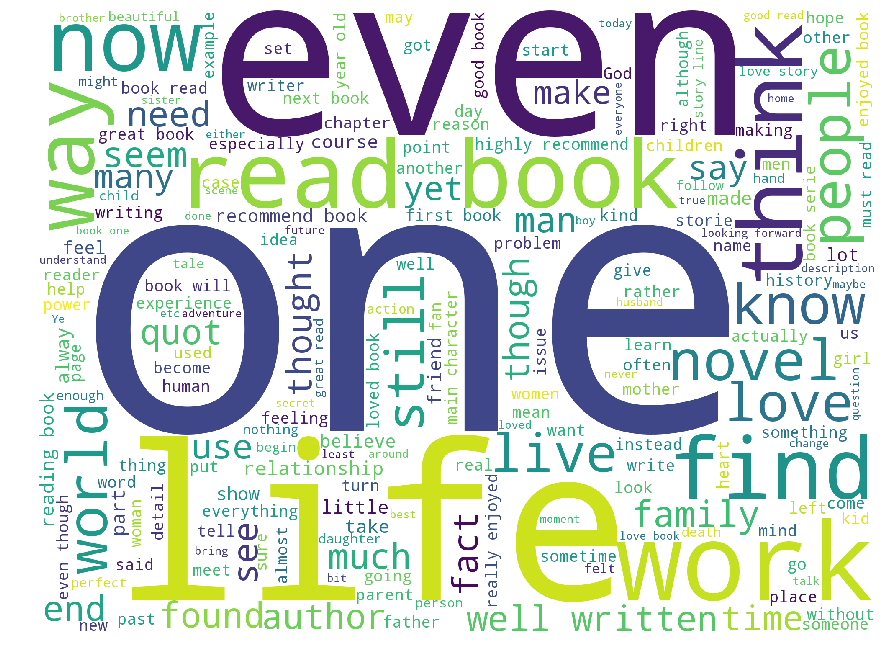

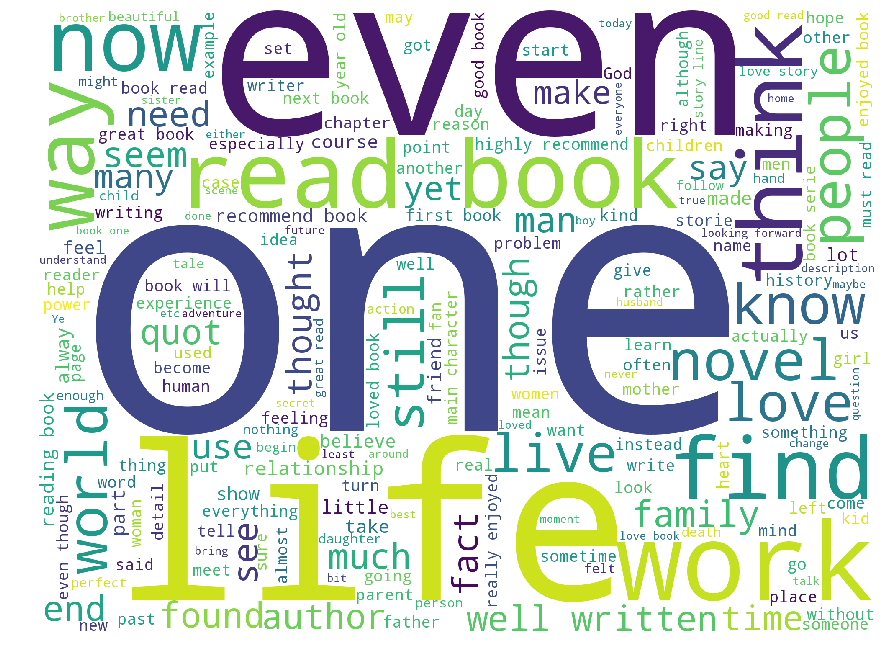

In [14]:
wcloud(1) #Visualize positive sentiments

In [15]:
#Preprocess the text
def text_to_words(raw_text):
    letters = re.sub("[^a-zA-Z]", " ",raw_text) #Grab letters
    words = letters.lower().split() #Lowercase                             
    stops = set(stopwords.words("english")) #Get unique stopwords                  
    meaningful_words = [w for w in words if not w in stops] 
    return ( " ".join( meaningful_words ))

In [16]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /content/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package stopwords to /content/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
#Append new column
df['clean_text']=df['reviewText'].apply(lambda x: text_to_words(x))

### Test-Train Splitting

In [18]:
#Split the data into two sets namely the train and test set
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['Sentiment'], test_size=0.2, random_state=0)

### TF-IDF and vectorization

In [19]:
#Create the transform
vectorizer = TfidfVectorizer(max_features=1000, min_df=3, max_df=0.8, stop_words=stopwords.words('english'))  

#Encode document
X_train_vector = vectorizer.fit_transform(X_train) #Fit to training features and transform

X_test_vector = vectorizer.transform(X_test) #Only transform test features using the same vectorizer

#Summarize encoded vector
print("The shape of X_train_vector is: ", X_train_vector.shape)
print("The shape of X_test_vector is: ", X_test_vector.shape)

The shape of X_train_vector is:  (160000, 1000)
The shape of X_test_vector is:  (40000, 1000)
The shape of X_train_vector is:  (160000, 1000)
The shape of X_test_vector is:  (40000, 1000)


### Model Training

In [20]:
#Define the model and fit it to the training data
classifier = LogisticRegression(C=2.0, random_state=0, solver='sag', class_weight='balanced')
classifier.fit(X_train_vector, y_train)

LogisticRegression(C=2.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='sag', tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(C=2.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='sag', tol=0.0001, verbose=0, warm_start=False)

In [21]:
#Predict using test set
y_pred = classifier.predict(X_test_vector)

In [22]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.46      0.79      0.58      7385
          1       0.94      0.79      0.86     32615

avg / total       0.85      0.79      0.81     40000

             precision    recall  f1-score   support

          0       0.46      0.79      0.58      7385
          1       0.94      0.79      0.86     32615

avg / total       0.85      0.79      0.81     40000



### Evaluation

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


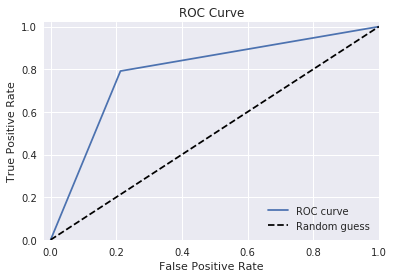

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


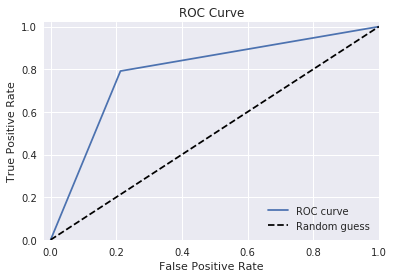

In [23]:
#ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
#Create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


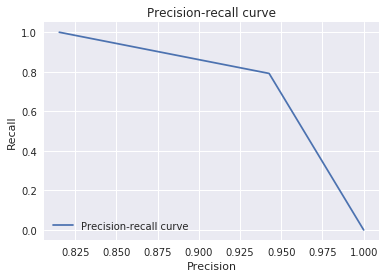

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


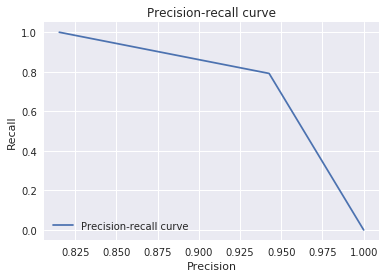

In [24]:
#Precision vs Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
#Create plot
plt.plot(precision, recall, label='Precision-recall curve')
_ = plt.xlabel('Precision')
_ = plt.ylabel('Recall')
_ = plt.title('Precision-recall curve')
_ = plt.legend(loc="lower left")

In [25]:
#Check the roc_auc_score
roc_auc_score(y_test, y_pred)

0.7894505572750181

0.7894505572750181

### Multinomial Naive Bayes does not perform as well as Logistic Regression on this dataset

In [30]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train_vector, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [31]:
#Predict using test set
y_pred2 = clf.predict(X_test_vector)

In [32]:
print(classification_report(y_test,y_pred2))

             precision    recall  f1-score   support

          0       0.93      0.03      0.06      7385
          1       0.82      1.00      0.90     32615

avg / total       0.84      0.82      0.75     40000

             precision    recall  f1-score   support

          0       0.93      0.03      0.06      7385
          1       0.82      1.00      0.90     32615

avg / total       0.84      0.82      0.75     40000



/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


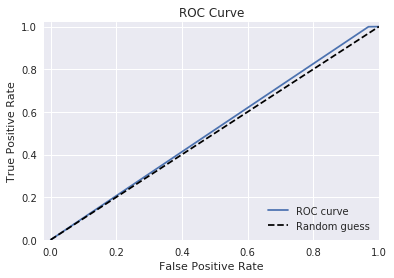

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


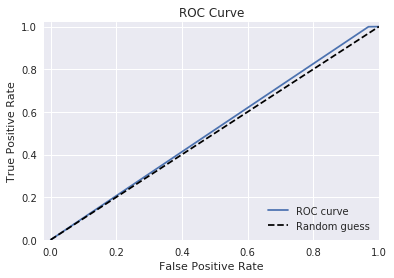

In [33]:
#ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
#Create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

In [34]:
#Check the roc_auc_score
roc_auc_score(y_test, y_pred2)

0.51556697819735

0.51556697819735